# **Matrices**

In [1]:
from sympy import Matrix, init_printing
init_printing()

**What is a matrix?**

A matrix is an ordered arrangement of numbers or variables. For example

In [2]:
A = Matrix( [ [1,2], [3,4] ] )
A

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [3]:
from sympy import symbols
a, b, c, d = symbols('a b c d')
B = Matrix( [ [a, b], [c, d] ] )
B

⎡a  b⎤
⎢    ⎥
⎣c  d⎦

Here 1, 2, 3, 4 and a, b, c, d are called the *elements* of the respective matrices

What's the point of matrices? Well, for a start, they let us efficiently carry out operations on a large number of numbers or variables simultaneously

In [4]:
# Multiplying a matrix by a number
# In this context, we call number a 'scalar', just meaning a single number that's not a matrix
# Result = each element * the scalar
3*A

⎡3  6 ⎤
⎢     ⎥
⎣9  12⎦

In [5]:
# Difference of two matrices
# Result = difference, element-by-element
B-A

⎡a - 1  b - 2⎤
⎢            ⎥
⎣c - 3  d - 4⎦

**Matrix shape**

Matrices have a shape = (rows, columns)

In [6]:
# A is a square matrix - 2 x 2
A.shape

In [7]:
C = Matrix( [ [1, 2] ] )
C

[1  2]

In [8]:
# C is a row vector - 1 x 2
C.shape

Some matrix operations are only possible on matrices of the same shape. For example, we can only add and subtract matrices of the same shape

In [9]:
# B minus A works, as we saw above
# We have a 2x2 matrix minus another 2x2 matrix
B-A

⎡a - 1  b - 2⎤
⎢            ⎥
⎣c - 3  d - 4⎦

In [10]:
# A minus C will throw a shape error!
# A is 2x2, but C is 1x2. So, we have an 'extra' row in A that isn't 'matched' by a row in C.
A-C

ShapeError: Matrix size mismatch: (2, 2) + (1, 2)

**Matrix multiplication**

What about matrix multiplication? <br>We multiplied a matrix by a scalar above, and that was clear enough, but what about multiplying one matrix by another?

In [11]:
D = Matrix( [ [5, 6], [7, 8] ] )
# Print the two matrices to be multiplied
A, D

⎛⎡1  2⎤  ⎡5  6⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣3  4⎦  ⎣7  8⎦⎠

In [12]:
A*D

⎡19  22⎤
⎢      ⎥
⎣43  50⎦

In [13]:
D*A

⎡23  34⎤
⎢      ⎥
⎣31  46⎦

Where do these answers come from? What does they mean? Why isn't A*D = D*A (i.e. why isn't matrix multiplication *commutative*)? To see what's going on more clearly, let's redefine A as

In [14]:
A = Matrix( [ [a, b], [c, d] ] )
A

⎡a  b⎤
⎢    ⎥
⎣c  d⎦

and B as

In [15]:
e, f, g, h = symbols('e f g h')
B = Matrix( [ [e, f], [g, h] ] )
B

⎡e  f⎤
⎢    ⎥
⎣g  h⎦

Now we get explicit formulae for the matrix products

In [16]:
A*B

⎡a⋅e + b⋅g  a⋅f + b⋅h⎤
⎢                    ⎥
⎣c⋅e + d⋅g  c⋅f + d⋅h⎦

In [17]:
B*A

⎡a⋅e + c⋅f  b⋅e + d⋅f⎤
⎢                    ⎥
⎣a⋅g + c⋅h  b⋅g + d⋅h⎦

// Go through matrix multiplication for these two matrices on the board <br><br>
This means that, in general, matrix multiplication is *non-commutative*. Unlike numbers, where, say, 2 x 3 = 3 x 2, and variables, where x * y = y * x, for matrices, the *order matters*!

Matrices can only be multiplied in this way if the number of columns in the left-hand matrix equals the number of rows in the right hand matrix. Otherwise you'll have a mismatch in the number of elements you're multiplying and summing to derive each element of the product matrix.

In [18]:
A = Matrix( [ [1, 2, 3], [4, 5, 6] ] )
A, A.shape

⎛⎡1  2  3⎤        ⎞
⎜⎢       ⎥, (2, 3)⎟
⎝⎣4  5  6⎦        ⎠

In [19]:
B = Matrix( [ [7], [8], [9] ] )
B, B.shape

⎛⎡7⎤        ⎞
⎜⎢ ⎥        ⎟
⎜⎢8⎥, (3, 1)⎟
⎜⎢ ⎥        ⎟
⎝⎣9⎦        ⎠

In [20]:
# This is fine, as we have (2x3) x (3x1)
A*B

⎡50 ⎤
⎢   ⎥
⎣122⎦

// Go through pattern here that, for (r1 x c1) x (r2 x c2), c1 must equal r2, and the resulting matrix has shape (r1 x c2)

In [21]:
# This won't work, as we have (3x1) x (2x3), c1 doesn't equal r2
B*A

ShapeError: Matrix size mismatch: (3, 1) * (2, 3).

**Matrix inverse**<br>
For a number, say 3, we have the idea of the inverse of that number, 1/3, so that 3 x 1/3 = 1. Similarly, for a variable x, we have x * 1/x = 1. Even for a function, f^-1(f(x)) = x. So we have a concept that operating on a 'thing' by the *inverse* of that 'thing' leaves everything unchanged. Matrices have the similar concept of a *matrix inverse*. So A x A^-1 = A^-1 x A = I. I is the matrix equivalent of '1', and is called the identity matrix.

In [22]:
A = Matrix( [ [1, 2], [3, 4] ] )
A, A.inv()

⎛⎡1  2⎤  ⎡-2    1  ⎤⎞
⎜⎢    ⎥, ⎢         ⎥⎟
⎝⎣3  4⎦  ⎣3/2  -1/2⎦⎠

In [23]:
# A * Ainv yields the (2x2) identity matrix
A * A.inv()

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [24]:
# ditto Ainv * A
A.inv() * A

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

So the identity matrix is just a matrix with 1's down the backward facing diagonal, and zeros everywhere else. It's the matrix equivalent of the number 1, i.e. multiplying any matrix by I (assuming shapes are *conformable*) leaves the matrix unchanged

In [25]:
from sympy import eye
# eye(2) gives us the (2x2) identity matrix
I_2 = eye(2)
I_2

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [26]:
# here's the (3x3) identity matrix
I_3 = eye(3)
I_3

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [27]:
A*I_2 == A

True

In [28]:
I_2 * A == A

True

In [29]:
A*A.inv() == I_2

True

**Determinant**<br>
A matrix has an inverse only if its *determinant* is non-zero. The determinant is some value calculated from the matrix as a complicated function of its elements. The precise function depends upon the size of the matrix!

In [30]:
# Determinant of a (2x2) matrix
A = Matrix( [ [a, b], [c, d] ] )
A, A.det()

⎛⎡a  b⎤           ⎞
⎜⎢    ⎥, a⋅d - b⋅c⎟
⎝⎣c  d⎦           ⎠

In [31]:
# Determinant of a (3x3) matrix
a, b, c, d, e, f, g, h, i = symbols('a b c d e f g h i')
B = Matrix( [ [a, b, c], [d, e, f], [g, h, i] ] )
B, B.det()

⎛⎡a  b  c⎤                                               ⎞
⎜⎢       ⎥                                               ⎟
⎜⎢d  e  f⎥, a⋅e⋅i - a⋅f⋅h - b⋅d⋅i + b⋅f⋅g + c⋅d⋅h - c⋅e⋅g⎟
⎜⎢       ⎥                                               ⎟
⎝⎣g  h  i⎦                                               ⎠

Don't worry too much about where these formulae come from, it's technical! Let's look at the conditions where we don't have a determinant. For a start, only square matrices have a determinant

In [32]:
A = Matrix( [ [1, 2, 3], [4, 5, 6] ] )
A.det()

NonSquareMatrixError: 

In [33]:
A = Matrix ( [ [1, 1, 3], [4, 1, 7], [6, 8, 9] ] )
A, A.det()

⎛⎡1  1  3⎤    ⎞
⎜⎢       ⎥    ⎟
⎜⎢4  1  7⎥, 37⎟
⎜⎢       ⎥    ⎟
⎝⎣6  8  9⎦    ⎠

In [34]:
# What happens if we duplicate one of the rows?
A = Matrix ( [ [1, 1, 3], [1, 1, 3], [6, 8, 9] ] )
A, A.det()

⎛⎡1  1  3⎤   ⎞
⎜⎢       ⎥   ⎟
⎜⎢1  1  3⎥, 0⎟
⎜⎢       ⎥   ⎟
⎝⎣6  8  9⎦   ⎠

In [35]:
# What happens if we duplicate one of the rows?
A = Matrix ( [ [1, 1, 3], [1, 1, 2], [6, 6, 9] ] )
A, A.det()

⎛⎡1  1  3⎤   ⎞
⎜⎢       ⎥   ⎟
⎜⎢1  1  2⎥, 0⎟
⎜⎢       ⎥   ⎟
⎝⎣6  6  9⎦   ⎠

# **Systems of linear equations**

Let's actually use matrix algebra for something. The main use, to my mind, of matrices is that they let you simultaneously perform operations on lots of variables/numbers at once.<br>
Imagine we want to solve the following set of equations

In [36]:
from sympy import Eq
x, y, z = symbols('x y z')
eq1 = Eq(x + y + z, 6)
eq2 = Eq(2*y + 5*z, -4)
eq3 = Eq(2*x + 5*y - z, 27)
eq1, eq2, eq3

Let's see how we could represent this in matrix form

In [37]:
# Form a matrix of the coefficients of the equations
A = Matrix( [ [1, 1, 1], [0, 2, 5], [2, 5, -1] ] )
A

⎡1  1  1 ⎤
⎢        ⎥
⎢0  2  5 ⎥
⎢        ⎥
⎣2  5  -1⎦

In [38]:
# Then form a column vector of the variables
X = Matrix([ [x], [y], [z] ] )
X

⎡x⎤
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [39]:
# Calculate the matrix product - we get back the LHSs of our original equations!
# (3x3) x (3x1) = (3x1)
A*X

⎡  x + y + z  ⎤
⎢             ⎥
⎢  2⋅y + 5⋅z  ⎥
⎢             ⎥
⎣2⋅x + 5⋅y - z⎦

In [40]:
# Now form a column matrix of the constants
B = Matrix( [ [6], [-4], [27] ] )
B

⎡6 ⎤
⎢  ⎥
⎢-4⎥
⎢  ⎥
⎣27⎦

In [41]:
matrix_eq = Eq(A*X, B)
matrix_eq

⎡  x + y + z  ⎤   ⎡6 ⎤
⎢             ⎥   ⎢  ⎥
⎢  2⋅y + 5⋅z  ⎥ = ⎢-4⎥
⎢             ⎥   ⎢  ⎥
⎣2⋅x + 5⋅y - z⎦   ⎣27⎦

In [42]:
soln = Eq(A.inv()*A*X, A.inv()*B)
soln

⎡x⎤   ⎡5 ⎤
⎢ ⎥   ⎢  ⎥
⎢y⎥ = ⎢3 ⎥
⎢ ⎥   ⎢  ⎥
⎣z⎦   ⎣-2⎦

So, we operate on the left and right of the matrix equation with the inverse of the coefficients matrix. (A^-1 x A x X) on the left yields I x X = X, and on the right we have to multiply with A^-1 too, so we get X = A^-1 x B 

# **Vectors**

We've already done most of the heavy lifting to understand vectors by our work on matrices.  

**Vector multiplication - the dot product (aka scalar product)**

How do we multiply vectors, if they are *both* represented in column form, or *both* in row form?

In [59]:
# A column vector
u = Matrix([[1],[2],[3]])
u

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [61]:
# Another column vector
v = Matrix([[4], [5], [6]])
v

⎡4⎤
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣6⎦

In [62]:
# This won't work, as the shapes are wrong
u*v

ShapeError: Matrix size mismatch: (3, 1) * (3, 1).

In [63]:
u.shape, v.shape

Hmm, troublesome shapes. There are (at least) two ways to multiply vectors of similar shape. First, we can take the *transpose* of the appropriate vector to yield matching shapes for mutiplication: 

In [64]:
u.transpose()*v

[32]

In [65]:
# We see that this will yield a 1 x 1 product, i.e. a scalar
u.transpose().shape, v.shape

Second, we can use the .dot() method of one of the vectors

In [66]:
u.dot(v)

The .dot() method here implies that a vector multiplication yielding a scalar (i.e. just a number) is calles a *'dot product'*. You can think of the dot product as indicating the *degree of parallelism* of the vectors. A positive degree indicates some degree of alignment, 0 indicates the vectors are orthogonal (at right angles), while a negative value indicates some degree of anti-alignment. 

**Dot product - geometrical point of view**<br>
Let's see what the dot product does 'under the hood'

In [104]:
a, b, c, d, e, f, theta = symbols('a b c d e f theta')
u = Matrix([[a], [b], [c]])
v = Matrix([[d], [e], [f]])
u, v

⎛⎡a⎤  ⎡d⎤⎞
⎜⎢ ⎥  ⎢ ⎥⎟
⎜⎢b⎥, ⎢e⎥⎟
⎜⎢ ⎥  ⎢ ⎥⎟
⎝⎣c⎦  ⎣f⎦⎠

In [105]:
# What is the expression for the dot product in terms of elements?
u.dot(v)

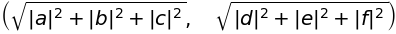

In [106]:
# What about the lengths of the vectors, also known as the magnitude (denoted |u|) or the L2-norm.
u.norm(), v.norm()

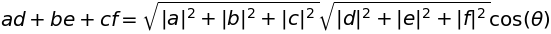

In [107]:
# The geometrical interpretation
from sympy import cos, acos, pi
eq = Eq(u.dot(v), u.norm()*v.norm()*cos(theta))
eq

In [114]:
# Let's set up two orthogonal vectors
u = Matrix([[1],[0],[1]])
v = Matrix([[0],[2],[0]])
# angle in radians
theta = acos( u.dot(v) / ( u.norm()*v.norm() ) )
# convert to degrees
(theta*180/pi).n()

In [115]:
# Two parallel vectors
u = Matrix([[1],[1],[1]])
v = Matrix([[2],[2],[2]])
theta = acos( u.dot(v) / ( u.norm()*v.norm() ) )
(theta*180/pi).n()

In [116]:
# Two anti-parallel vectors
u = Matrix([[1],[1],[1]])
v = Matrix([[-2],[-2],[-2]])
theta = acos( u.dot(v) / ( u.norm()*v.norm() ) )
(theta*180/pi).n()